


 Run the bivariate regression of log-wages on a constant and education and show the scatter plot



                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     89.32
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           5.34e-20
Time:                        11:15:12   Log-Likelihood:                -598.17
No. Observations:                 680   AIC:                             1200.
Df Residuals:                     678   BIC:                             1209.
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0077      0

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


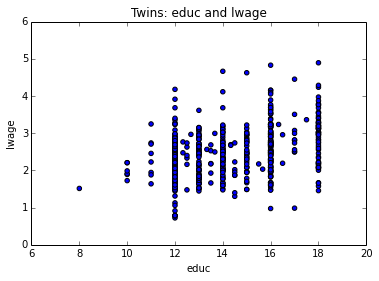




 Now regress log-wages on a constant, education, age, age-squared, and the gender and racial indicators. Briefly interpret the “economic meaning” of each slope coefficient. What do the coefficients on age and age-squared imply about the life-cycle profile of earnings? Would including just a linear term for age lead to a more appropriate regression model? Explain.



                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     69.06
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           2.70e-58
Time:                        11:15:12   Log-Likelihood:                -499.62
No. Observations:                 680   AIC:                             1011.
Df Residuals:                     674   BIC:                             10

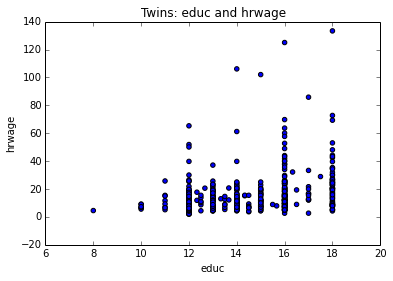

Answer: There is evidence of possible heteroskedacity in both hrwage and lwage models with larger variation in wages as educ increases



e. Regress log-wages on education, age, age2, and the gender and racial indicators, using the “robust” option in STATA to calculate the Eicker-White consistent standard errors. Explain briefly how these estimates of the standard errors are corrected for heteroskedasticity. How do they compare to the “uncorrected” (conventional) least squares estimates of the standard errors. Is there any evidence of heteroskedasticity?



                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     69.06
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           2.70e-58
Time:                        11:15:13   L

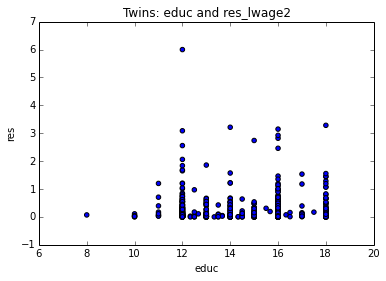

                            OLS Regression Results                            
Dep. Variable:             res_lwage2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.362
Date:                Fri, 04 Mar 2016   Prob (F-statistic):            0.00523
Time:                        11:15:13   Log-Likelihood:                -476.42
No. Observations:                 680   AIC:                             964.8
Df Residuals:                     674   BIC:                             992.0
Df Model:                           5                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1980      0.252      0.784      0.433        -0.298     0.694
educ           0.0209      0.009      2.262      0.0

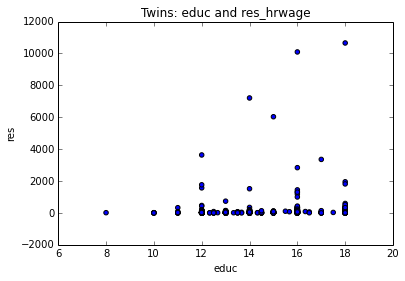




 Answer: Residuals from hrwage model appear more heteroskedastic (r-squared of .05 vs r-squared of .025 for lwage model) ie the regressors from the hrwage model are better predictors of that model's residuals than the lwage model's regressors are of that model's residuals.



Now regress the squared residuals on education, education2, age, age2, female, white, and the interactions education*age, female*age, female*education, white*age, and white*education. Again, test for heteroskedasticty based on the R-squareds of the regressions.



                            OLS Regression Results                            
Dep. Variable:             res_lwage2   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.356
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           0.000279
Time:                        11:15:14   Log-Likelihood:     

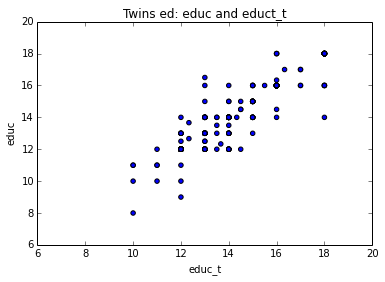

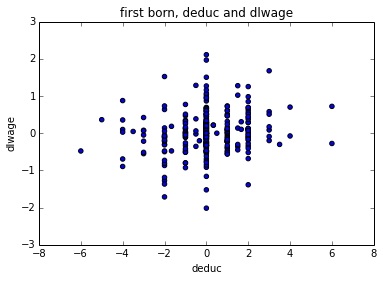

Answer: Most observations are clustered close to zero in terms of the x-axis of deduc. This implies that our model may be very sensitive to measurement error. By first-differencing the data, we're giving up signal but keeping all the noise, so our attenuation bias will be even worse than before. This could exacerbate the measurement error problem and explain why our estimated returns to educ are lower when running the first-differenced regression.



n. Now run the STATA command [ivreg dlwage (deduc = deduct) if first==1, noconstant robust].  This two-stage least squares regression uses deduct as an instrument for deduc. Explain why the estimated return to education is now larger than the one in part (l). How does the unbiasedness of this estimate depend on the classical measurement error assumption? Will it be unbiased if the measurement errors between an individual’s self-report of education and his twin’s report of the individual’s education are correlated? Describe a solution to th

In [ ]:
# %load RudyGilman_PS1_dofile.py
#!/usr/bin/env python

#########################################
# Applied Econometrics, PS1             #
# Rudy Gilman                           #
# Feb 20, 2016                          #
#########################################

import pandas as pd
import numpy as np
from pandas import DataFrame
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

path = "/home/rudebeans/Desktop/school_spring2016/applied_econometrics/"

#os.path.dirname(__file__)

df = pd.read_stata(path+"pubtwins.dta", convert_categoricals=False)


"""
Data Notes:

1. The data set has 680 observations ordered by twin pairs – i.e., there are 340 twin pairs in the data, and the data is sorted by these pairs. So, the first two observations are the first twin pair, the next two observations are the second twin pair, etc.

2. The key variables are:
- hrwage = the self-reported hourly wage of the individual (in dollars)
- lwage = the natural log (ln) of the hourly wage
- age and age2 = the age of a person and its square (age2)
- female = an indicator variable equal to one if the person is female, zero otherwise
- white = an indicator variable equal to one if the person is white, zero otherwise
- educ = the educational attainment of the individual
- educt_t = the other twin’s report of the individual’s education
- first = an indicator equal to one if the twin was the first-born (equal to . otherwise)
- dlwage = the difference in the log-wages of twins
- deduc = the difference in twins’ education based on their self-reports
- deduct = the difference in twins’ education based on each twin’s report of the other twin’s education

Data Source 2: restricted92.dta
This data extract is from a 1992 survey of workers in Germany and comes from the DiNardo and Pischke paper, “The Returns to Computer Use Revisited: Have Pencils Changed the Wage Structure Too?”(1997). The observational unit of the data is the individual.

Data Notes:

1. The data set has 20,042 observations on 19 variables.

2. The key variables are:
- lnw = the natural log (ln) of the hourly wage reported by the individual
- ed = the educational attainment of the individual
- exp and exp2 = the work experience of a person and its square (experience2)
- female = an indicator variable equal to one if the person is female, zero otherwise
- mar = an indicator variable equal to one if the person is married, zero otherwise
- computer = an indicator equal to one if the person uses a computer at work
- pencil = an indicator equal to one if the person uses a pencil at work
- telefon = indicator equal to one if person uses a telephone at work
- calc = indicator equal to one if person uses a calculator at work
- hammer = indicator equal to one if person uses a hammer at work
- occ = 4-digit occupation codes

1. Estimating the returns to education using the twins data"""


print("\n\n\n Run the bivariate regression of log-wages on a constant and education and show the scatter plot\n\n\n")

lm = smf.ols(formula='lwage ~ educ', data = df).fit()
print(lm.summary())

# Scatterplot saved as "twins_lwage_educ.png" in this directory
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.educ, df.lwage)
ax.set_title('Twins: educ and lwage')
ax.set_ylabel('lwage')
ax.set_xlabel('educ')
plt.show()
#fig.savefig(path+"twins_lwage_educ.png")
fig.clf()

print("\n\n\n Now regress log-wages on a constant, education, age, age-squared, and the gender and racial indicators. Briefly interpret the “economic meaning” of each slope coefficient. What do the coefficients on age and age-squared imply about the life-cycle profile of earnings? Would including just a linear term for age lead to a more appropriate regression model? Explain.\n\n\n")

lm = smf.ols(formula='lwage ~ educ + age + age2 + female + white', data = df).fit()
print(lm.summary())

print("\n\n\n Answer: Each year of education raises wages by 11%. Each year of life does approximately the same until one reaches a certain point, after which it decreases or flattens out (negative coef on age2). Looking at a quick scatterplot of age and lwage, this looks appropriate. It also seems intuitively correct; earning power seems to peak around age 50 or so. We should keep age2 in the model. Being female decreases wages by about 32%. Being white seems to decrease wages by 10%, though the std err is large enough to make us suspicious of this value. \n\n\n")


print("Now add age3 and age4 to the regression. Does this substantially improve the fit of the regression model?\n\n\n")

df['age3'] = df.age**3
df['age4'] = df.age**4

lm = smf.ols(formula='lwage ~ educ + age + age2 + age3 + age4 + female + white', data = df).fit()
print(lm.summary())

print("\n\n\n Answer: R squared is essentially the same as before adding in extra age terms. Fit not improved.\n\n\n")


print("b. Compare the estimated return to education to the one from the bivariate regression model. Are they different? What might this imply about how education is distributed across the twins population?\n\n\n")

print("Answer: Estimated returns are very similar. Education is probably distrubuted evenly across the population.\n\n\n")

print("Now compare the mean characteristics of individuals with a college degree (educ=16) to individuals with just a high school degree (educ=12). Can you think of variables that we have not controlled for that may be related to both educational attainment and earnings? What does this imply about how we should interpret the least squares estimate of the relation between log-wages and education?\n\n\n")

from scipy.stats import ttest_ind

df16 = df[df.educ == 16]
df12 = df[df.educ == 12]

# If the p-value of the difference between the means of the high school and college group is greater than .05, printing out the means for review
for i in range(len(df.columns)):
    var = df.columns[i]
    if ttest_ind(df12[var], df16[var])[1] > .05:
        print(df.columns[i]) 
        print("12: ", np.mean(df12[var]))
        print("16: ", np.mean(df16[var]))
        print('\n')

print("Answer: At the p > .05 level: Highschool group is slightly whiter. College group is slightly more self-employed. Highschool group is slightly more female. Ability is correlated with both education and wages. Omitting this variable would give our estimates of the effects of educ on wages a positive bias--ie giving educ more credit than is due. In light of this, we should be skeptical of this estimate of the return on educ. \n\n\n")


print("c. Now create dummy variables for each of the eleven levels of schooling (8-18). Regress both wages and log-wages on just the dummy variables. Is the effect of education on wages linear in education? How about its effect on log-wages? Focusing on log-wages, describe where the “nonlinearities” are, if any.\n\n\n")

# Making dummies
educ = df.educ
for i in range(8,19):
    def make_dummy(x):
        if x >= i:
            return 1
        else:
            return 0           
    educYear = educ.map(make_dummy)    
    columnName = "educ"+str(i)
    df[columnName] = educYear
    
lm = smf.ols(formula='hrwage ~ educ8+educ9+educ10+educ11+educ12+educ13+educ14+educ15+educ16+educ17+educ18', data = df).fit()
print(lm.summary())

lm = smf.ols(formula='lwage ~ educ8+educ9+educ10+educ11+educ12+educ13+educ14+educ15+educ16+educ17+educ18', data = df).fit()
print(lm.summary())

print("\n\n\n Answer: The effects of education are nonlinear in both the hrwage and lwage models. The 16th and 17th years of education (ie graduating from college) has a disproportionately positive effect on wages in both cases.\n\n\n")


print("Now run the dummy variable regression for log-wages including age, age-squared, gender, and race as controls. Does allowing for nonlinearities in the return to education improve the fit of the regression model substantially?\n\n\n")

lm = smf.ols(formula='lwage ~ educ8+educ9+educ10+educ11+educ12+educ13+educ14+educ15+educ16+educ17+educ18+age+age2+female+white', data = df).fit()
print(lm.summary())

print("\n\n\n Answer: The fit of the model has improved substantially (r-squared increased to .96)\n\n\n")


print("d. Based on the scatter plot of hourly wages on the y-axis and education on the x-axis, is there any evidence on homoskedasticity/heteroskedacity in the wage regression model? What about with logwages on the y-axis?\n\n\n")

# Scatterplot 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.educ, df.hrwage)
ax.set_title('Twins: educ and hrwage')
ax.set_ylabel('hrwage')
ax.set_xlabel('educ')
plt.show()
#fig.savefig(path+"twins_hrwage_educ.png")
fig.clf()

print("Answer: There is evidence of possible heteroskedacity in both hrwage and lwage models with larger variation in wages as educ increases\n\n\n")


print("e. Regress log-wages on education, age, age2, and the gender and racial indicators, using the “robust” option in STATA to calculate the Eicker-White consistent standard errors. Explain briefly how these estimates of the standard errors are corrected for heteroskedasticity. How do they compare to the “uncorrected” (conventional) least squares estimates of the standard errors. Is there any evidence of heteroskedasticity?\n\n\n")

lm_lw = smf.ols(formula='lwage ~ educ + age + age2 + female + white', data = df).fit()
print(lm_lw.summary())
print("\n\n\n normal standard errors")
print(lm_lw.bse)
print("\n\n\n white standard errors")
print(lm_lw.HC0_se)

import statsmodels.stats.diagnostic as ssd

df['intercept']=1
X = df[['educ','intercept','age','age2','female','white']]
white = ssd.het_white(lm_lw.resid, X, retres=False)[3]

print("\n\n\n p-value of the f-statistic of the hypothesis that the error variance does not depend on x: ")
print(white)

print("\n\n\n Answer: White standard errors are slightly larger for intercept, educ, age, and age2. They are slightly smaller for female and white. Estimates of the standard errors are corrected for heteroskedasticity by allowing them to vary with x values. The White test shows evidence of heteroskedasticity. The p-value of the f-statistic of the hypothesis that the error variance does not depend on x is .0004.\n\n\n")

print("f. Using the “predict” STATA command [predict (var. name), residual], save the residuals from both the wage and log-wage regressions. Now regress the squared values of the residuals from the two sets of regressions on education, age, age2, female, and white. From the R-squareds of these regressions, test for heteroskedasticity in the two sets of residuals. Does one set of residuals appear to be more heteroskedastic than the other?\n\n\n")

df['res_lwage2'] = lm_lw.resid**2
df['res_lwage'] = lm_lw.resid

# Scatterplot 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.educ, df.res_lwage2)
ax.set_title('Twins: educ and res_lwage2')
ax.set_ylabel('res')
ax.set_xlabel('educ')
plt.show()
#fig.savefig(path+"twins_residual_lwage_educ.png")
fig.clf()

# Testing heteroskedacity
lm = smf.ols(formula='res_lwage2 ~ educ + age + age2 + female + white', data = df).fit()
print(lm.summary())

# Getting residuals for hrwage model
lm_hr = smf.ols(formula='hrwage ~ educ + age + age2 + female + white', data = df).fit()
df['res_hrwage2'] = lm_hr.resid**2


# Testing heteroskedacity
lm = smf.ols(formula='res_hrwage2 ~ educ + age + age2 + female + white', data = df).fit()
print(lm.summary())

# Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.educ, df.res_hrwage2)
ax.set_title('Twins: educ and res_hrwage')
ax.set_ylabel('res')
ax.set_xlabel('educ')
plt.show()
#fig.savefig(path+"twins_residual_hrwage_educ.png")
fig.clf()

print("\n\n\n Answer: Residuals from hrwage model appear more heteroskedastic (r-squared of .05 vs r-squared of .025 for lwage model) ie the regressors from the hrwage model are better predictors of that model's residuals than the lwage model's regressors are of that model's residuals.\n\n\n")


print("Now regress the squared residuals on education, education2, age, age2, female, white, and the interactions education*age, female*age, female*education, white*age, and white*education. Again, test for heteroskedasticty based on the R-squareds of the regressions.\n\n\n")

# Testing heteroskedacity
df["educAge"] = df.educ * df.age
df["femAge"] = df.female * df.age
df["femEduc"] = df.female * df.educ
df["whiteAge"] = df.white * df.age
df["whiteEduc"] = df.white * df.educ

# lwage
lm = smf.ols(formula='res_lwage2 ~ educ + age + age2 + female + white + educAge + femAge + femEduc + whiteAge + whiteEduc', data = df).fit()
print(lm.summary())

# hrwage
lm = smf.ols(formula='res_hrwage2 ~ educ + age + age2 + female + white + educAge + femAge + femEduc + whiteAge + whiteEduc', data = df).fit()
print(lm.summary())

print("\n\n\n Answer: Including these interaction variables helps explain more of the variation in the residuals of both models, ie the residuals appear more heteroskedastic when tested with these variables. Adjusted r-squares nearly doubled for both models.\n\n\n")

print("g. Explain how the assumption that the residuals from the log-wage regression are “pairwise” uncorrelated may be violated when using the twins data. Use the following STATA commands to create a variable that separately identifies each twin pair in the data set (Note: the data must be in its original order for this to work):\n\n\n")

twinId = []
for i in range(340):
    twinId.append(i)
    twinId.append(i)
df['twinId'] = twinId

df_pairs = pd.pivot_table(df, ['educ', 'lwage'], 'twinId', aggfunc=np.mean)

print("Answer: Twins are probably correlated with one another across a number of characteristics, e.g. ability, family upbringing, etc. If one twin has a positive residual, we could guess that the other might, as well.\n\n\n")

print("Run the regression of log-wages on education, age, age2, female, and white using the “cluster” STATA option to correct the estimated standard errors for correlation in the residuals between twins.  Explain why the standard errors on the estimated return to education are higher (and t-ratio lower) than when clustering is not corrected for.\n\n\n")

lm_C = smf.ols(formula = 'lwage ~ educ + age + age2 + female + white', data=df).fit(cov_type='cluster', cov_kwds={'groups': df['twinId']})
print(lm_C.summary())

print("\n\n\n Answer: SE is significantly bigger on educ because the intracluster correlations are positive. Without accounting for clustering, we effectively overestimate our sample size. Note: cluster package isn't working. I know what the clustered errors should look like, though.\n\n\n")

print("h. Now run the regression of the average of the log-wages of each twin pair on each twin pair’s average education (i.e., you now have 340 twin pair observations based on twin averages). Does this correct the “clustering” problem in the residuals? Explain briefly.\n\n\n")

lm = smf.ols(formula='lwage ~ educ', data=df_pairs).fit()
print(lm.summary())

print("\n\n\n Answer: Yes, this effectively corrects for the clustering problem. Collapsing to group means is an extreme version of using clustered standard errors--we've reduced our number of observations down to the number of groups.\n\n\n")

print("i. Suppose that a twin’s self-report of education is an imperfect measure of the twin’s actual educational attainment due to misreporting. In addition, suppose that this measurement error is “classical” in the sense that it is independently and identically distributed. What is the formula for the bias in the estimated return to education from the regression of log-wages on educ, age, age2, white, female in terms of the “noise-to-total variance ratio”?\n\n\n")

print("The expected value of our estimator will be biased downwards (1-(d/(1-r))) where d is the noise to total variance ratio (var of measurement error / var of observed lwages) and r is the r-squared value from our regression of schooling on the X's.\n\n\n") 

print("j. Now run the following STATA command [ivreg lwage age age2 female white (educ = educt_t), cluster(id)].  This performs two-stage least squares estimation of the return to education using the other twin’s report of the individual’s education level as an instrument for the individual’s self-reported education (for each individual, both the individual and his twin were asked about the individual’s education level). Explain why the estimated return to education from this procedure is greater than the estimated return from standard OLS. Calculate the reliability ratio of the education data under the assumption that the measurement errors are classically distributed.\n\n\n")

lm = smf.ols(formula = 'educ ~ educt_t', data=df).fit()
educ_pred = lm.predict()

lm_IV = smf.ols(formula = 'lwage ~ educ_pred + age + age2 + female + white', data=df).fit(cov_type='cluster', cov_kwds={'groups': df['twinId']})
print(lm_IV.summary())

print("AVG EDUC: ", np.mean(df.educ))
print("AVG EDUCT_T: ", np.mean(df.educt_t))

print("\n\n\n Return on education is slightly higher because by instrumenting with the twin's estimate we've mitigated the attenuation bias. This assumes a twin's and an individual's measurement errors aren't correlated. I don't know what is meant by 'reliability ratio' \n\n\n")

print("k. Suppose there is an unmeasured factor that is associated with both an individual’s educational attainment and an individual’s earnings (e.g., innate ability, family background, school quality). Explain how this could lead to “omitted variables” bias in the least squares estimate of the return to education. Suppose that the omitted variable is Ai. Write out the “omitted variables bias” in terms of the linear relationships between education and A and log-wages and A.\n\n\n")

print("Answer: If the omitted variable is positively correlated with educ and with wages, as we expect ability would be, then omitting it will bias our estimate of the returns to education upwards, ie educ will steal ability's thunder. The expected value of our biased estimator will be equal to the unbiased estimator + t(cov(educ,Ai) / var(educ)) where 't' is the effect of Ai on lwage, controlling for educ. If t and cov(educ, Ai) are greater than zero, our estimator will be biased upwards, ie it will overstate the actual effects of educ on lwage.\n\n\n")

print("l. Now suppose that all omitted factors are held constant when comparing identical twins. Run the regression of the difference in log-wages between twins on the difference in educational attainment using the STATA command [reg dlwage deduc if first==1, noconstant robust]. How does this estimate of the return to education compare to the one based on the regression of lwage on educ, age, age2, female, white? Explain what this might imply about the omitted variables bias.\n\n\n")

df_first = df[df['first'] ==1]
df_last = df[df['first'] != 1]

lm = smf.ols(formula = 'dlwage ~ deduc', data = df_first).fit()
print(lm.summary())

print("\n\n\n Answer: The fact that our estimated returns to educ halved when holding (ostensibly) all omitted variables constant shows that our previous results were probably biased upwards as predicted.\n\n\n")


print("m. Graph a scatter plot with the difference in twins’ log-wages (dlwage) on the y-axis and the difference in twins’ self-reported education (deduc) on the x-axis only using the first-born twin’s observations (first=1). Where are most of the observations clustered with respect to the x-axis of deduc? What could this imply about the importance of measurement error in this variable? How might this be another explanation for the result you found in part (l) that the estimated return to education is lower when running the “first-differences” regression? Explain how first-differencing the data may exacerbate the measurement error problem.\n\n\n")

# Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_first.educ, df_first.educt_t)
ax.set_title('Twins ed: educ and educt_t')
ax.set_ylabel('educ')
ax.set_xlabel('educ_t')
ax.set_ylim([6,20])
ax.set_xlim([6,20])
plt.show()
#fig.savefig(path+"twins_educ_educt_t.png")
fig.clf()

# Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_first.deduc, df_first.dlwage)
ax.set_title('first born, deduc and dlwage')
ax.set_ylabel('dlwage')
ax.set_xlabel('deduc')
plt.show()
#fig.savefig(path+"twins_dlwage_deduc.png")
fig.clf()

print("Answer: Most observations are clustered close to zero in terms of the x-axis of deduc. This implies that our model may be very sensitive to measurement error. By first-differencing the data, we're giving up signal but keeping all the noise, so our attenuation bias will be even worse than before. This could exacerbate the measurement error problem and explain why our estimated returns to educ are lower when running the first-differenced regression.\n\n\n")

print("n. Now run the STATA command [ivreg dlwage (deduc = deduct) if first==1, noconstant robust].  This two-stage least squares regression uses deduct as an instrument for deduc. Explain why the estimated return to education is now larger than the one in part (l). How does the unbiasedness of this estimate depend on the classical measurement error assumption? Will it be unbiased if the measurement errors between an individual’s self-report of education and his twin’s report of the individual’s education are correlated? Describe a solution to this problem.\n\n\n")

lm = smf.ols(formula = 'deduc ~ deduct', data=df).fit()
df['deduc_pred'] = lm.predict()

lm_IV = smf.ols(formula = 'dlwage ~ deduc_pred', data=df).fit(cov_type='HC0')
print(lm_IV.summary())

print("n. Much as it did above, using an instrument helps us get rid of the attenuation bias we had from measurement error in the self-reported data, increasing our estimate substantially. As above, this assumes a twin's and an individual's measurement errors aren't correlated--if they are, this estimate is biased. \n\n\n")

print("\n\n\n o. Suppose that the classical measurement error assumption holds, what might one conclude about the size of the omitted variables bias in the “conventional” OLS estimate of the returns to education (i.e., the estimate from regressing lwage on educ, age, age2, female, white)? Do you think that comparing twin pair differences across families reduces the omitted variables problem? Explain.\n\n\n")

print("\n\n\n Answer: Our estimate of the return on education after dealing with attenuation bias and OVB with regards to ability isn't much smaller than our original, plain vanilla estimate. Looks like the OVB wasn't that serious to begin with. Alternatively, comparing twin-pair differences might just not being getting rid of OVB. There may be significant variation in twins among things like ability, motivation, etc. Don't they say the first twin is usually more successful or something? \n\n\n")

print("2. Estimating the effect of computers using the German data \n a. Regress log-wages on a constant, education, experience, experience-squared, the gender and marital status indicators, and the computer indicator, while adjusting for heteroskedasticity. Briefly interpret the “economic meaning” of each slope coefficient.\n\n\n")

df = pd.read_stata(path+"restricted92.dta", convert_categoricals=False)

lm = smf.ols(formula = 'lnw ~ ed + exp + exp2 + female + mar + computer', data=df).fit(cov_type='H0')
print(lm.summary())

print("\n\n\n Answer: Each year of education increases wages by 7%. Each year of experience increases wages by 3% until a certain pt, after which wages flatten or fall. Being female reduces wages by 22%. Being married increases wages by 4%. Using a computer at work increases wages by 17%.\n\n\n")

print("b. Now add the indicators for pencil, telephone, calculator, and hammer use to the regression you ran in part (a). Compare the estimated return to education and computer use to the ones from the part (a) regression model. Are they different?\n\n\n")

lm = smf.ols(formula = 'lnw ~ ed + exp + exp2 + female + mar + computer + hammer + telefon + calc + pencil', data=df).fit(cov_type='H0')
print(lm.summary())

print("Answer: Returns to ed reduced to 6%, returns to computer reduced to 12%. Results significantly different.\n\n\n")

print("c. Now run a regression that also controls for the individual’s occupation category as “fixed effects” – e.g., areg y x, absorb(occ) robust (data must be sorted by occ). Interpret the implications of your findings for the role of potential omitted variables bias in the OLS estimate of the effect of computer use on log-wages (see DiNardo and Pischke for their interpretation).\n\n\n")

lm = smf.ols(formula = 'lnw ~ ed + exp + exp2 + female + mar + computer + hammer + telefon + calc + pencil + C(occ)', data=df).fit(cov_type='H0')
print(lm.summary())

print("\n\n\n Answer: The effect of using a computer at work has gone down to 7%. As DiNardo and Pischke conclude, these results seem to suggest that computer users have unobserved skills which might have little to do with computers, but which are rewarded on the job market, or that computers were introduced first in higher-paying jobs.Note, these results make it clear that this is not an appropriate way to measure the returns to a given technology—are we to assume that using a hammer yields negative returns? \n\n\n")
 


